In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit
from xhistogram.xarray import histogram

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client(n_workers=8)
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 80.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35061,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 80.00 GiB
Comm: tcp://127.0.0.1:46427,Total threads: 1
Dashboard: /proxy/39219/status,Memory: 10.00 GiB
Nanny: tcp://127.0.0.1:35253,


In [3]:
### Generate new session

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'
session = cc.database.create_session(db)

### Spin-ups

In [4]:
def load_gat(expt_name):
    # [:-1] removes the snapshot at yyyy-01-01 for annual average purposes
    return cc.querying.getvar(expt_name, var, session, start_time = yr_beg, end_time = yr_end)[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time').load()

var = 'temp_global_ave'
yr_beg = '1900-02-01'
yr_end = '2099-12-31'

# spinup_kb4 = load_gat('1deg_jra55_ryf_cont_kb4')
# spinup_nokb = load_gat('1deg_jra55_ryf_cont_nokb')

In [5]:
# fig, ax = plt.subplots(1,2,figsize=(12,5))

# ax[0].plot(spinup_kb4, label='kb4')
# ax[1].plot(spinup_nokb, label='nokb')
# for i in range(2):
#     ax[i].set_ylabel('Global average temperature (K)',fontsize=12)
#     ax[i].set_xlabel('Years',fontsize=12)
#     ax[i].set_title('Global average temperature, spin-up period',fontsize=12)
#     ax[i].legend(fontsize=12)
#     ax[i].grid()
    
# # plt.savefig('kb4_nokb_spinup200.jpg', dpi=200)

## Global average temperature and SST

In [6]:


var = 'temp_global_ave'

yr_beg = '2100-02-01'
yr_end = '2119-12-31'
gat_cont_kbv = load_gat('1deg_jra55_ryf_cont')
gat_cool_kbv = load_gat('1deg_jra55_ryf_cool_x1_kbv')
gat_warm_kbv = load_gat('1deg_jra55_ryf_warm_x1_kbv')

yr_beg = '2100-02-01'
yr_end = '2119-12-31'
gat_cont_kb4 = load_gat('1deg_jra55_ryf_cont_kb4')
gat_cool_kb4 = load_gat('1deg_jra55_ryf_cool_x1_kb4')
gat_warm_kb4 = load_gat('1deg_jra55_ryf_warm_x1_kb4')

gat_cont_nokb = load_gat('1deg_jra55_ryf_cont_nokb')
gat_cool_nokb = load_gat('1deg_jra55_ryf_cool_x1_nokb')
gat_warm_nokb = load_gat('1deg_jra55_ryf_warm_x1_nokb')

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


In [6]:
def load_sst(expt_name):
    # [:-1] removes the snapshot at yyyy-01-01 for annual average purposes
    return cc.querying.getvar(expt_name, var, session, start_time = yr_beg, end_time = yr_end)[:-1].chunk(chunks='auto').groupby('time.year').mean(dim='time').load()
    
var = 'temp_surface_ave'
yr_beg = '2400-01-02'
yr_end = '2419-12-31'

sst_cont_kbv = load_sst('1deg_jra55_ryf_cont')
sst_cool_kbv = load_sst('1deg_jra55_ryf_cool_x1_kbv')
sst_warm_kbv = load_sst('1deg_jra55_ryf_warm_x1_kbv')

yr_beg = '2100-01-02'
yr_end = '2119-12-31'
sst_cont_kb4 = load_sst('1deg_jra55_ryf_cont_kb4')
sst_cool_kb4 = load_sst('1deg_jra55_ryf_cool_x1_kb4')
sst_warm_kb4 = load_sst('1deg_jra55_ryf_warm_x1_kb4')

sst_cont_nokb = load_sst('1deg_jra55_ryf_cont_nokb')
sst_cool_nokb = load_sst('1deg_jra55_ryf_cool_x1_nokb')
sst_warm_nokb = load_sst('1deg_jra55_ryf_warm_x1_nokb')

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


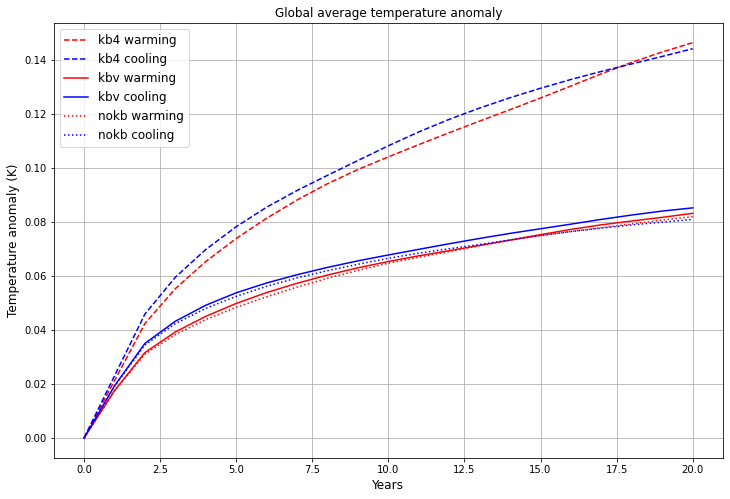

In [17]:
def anomaly_to_plot(perturbation, control):
    return np.append(0, perturbation - control)

plt.figure(figsize=(12,8))

plt.plot(anomaly_to_plot(gat_warm_kb4, gat_cont_kb4), color='r', linestyle='--', label='kb4 warming')
plt.plot(-1*anomaly_to_plot(gat_cool_kb4, gat_cont_kb4), color='b', linestyle='--', label='kb4 cooling')
plt.plot(anomaly_to_plot(gat_warm_kbv, gat_cont_kbv), color='r', label='kbv warming')
plt.plot(-1*anomaly_to_plot(gat_cool_kbv, gat_cont_kbv), color='b', label='kbv cooling')
plt.plot(anomaly_to_plot(gat_warm_nokb, gat_cont_nokb), color='r', linestyle=':', label='nokb warming')
plt.plot(-1*anomaly_to_plot(gat_cool_nokb, gat_cont_nokb), color='b', linestyle=':', label='nokb cooling')

plt.title('Global average temperature anomaly',fontsize=12)
plt.legend(fontsize=12)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Temperature anomaly (K)',fontsize=12)
plt.grid()

# plt.savefig('access_diff_diffusivities_global_temp.jpg', dpi=200)

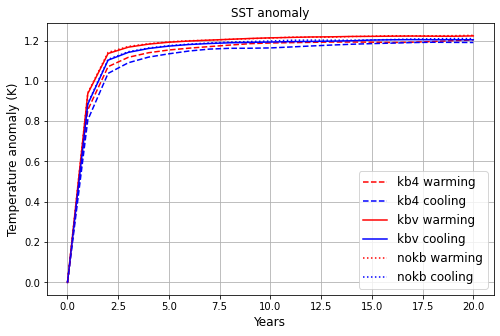

In [88]:
plt.figure(figsize=(8,5))

plt.plot(anomaly_to_plot(sst_warm_kb4, sst_cont_kb4), color='r', linestyle='--', label='kb4 warming')
plt.plot(-1*anomaly_to_plot(sst_cool_kb4, sst_cont_kb4), color='b', linestyle='--', label='kb4 cooling')

plt.plot(anomaly_to_plot(sst_warm_kbv, sst_cont_kbv), color='r', label='kbv warming')
plt.plot(-1*anomaly_to_plot(sst_cool_kbv, sst_cont_kbv), color='b', label='kbv cooling')

plt.plot(anomaly_to_plot(sst_warm_nokb, sst_cont_nokb), color='r', linestyle=':', label='nokb warming')
plt.plot(-1*anomaly_to_plot(sst_cool_nokb, sst_cont_nokb), color='b', linestyle=':', label='nokb cooling')

plt.title('SST anomaly',fontsize=12)
plt.legend(fontsize=12)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Temperature anomaly (K)',fontsize=12)
plt.grid()

# plt.savefig('access_diff_diffusivities_sst.jpg', dpi=200)

Define a nonlinearity metric for any variable, $x$ $$n_x(t) = \frac{x'_c + x'_w}{(|x'_c| + |x'_w|)/ 2},$$ where primes denote anomalies and subscripts denote cooling or warming, and cooling anomalies have _not_ been multiplied by $-1$ in this notation; i.e., $n_x(t)$ measures the size of the nonlinear response divided by the average magnitude of response.

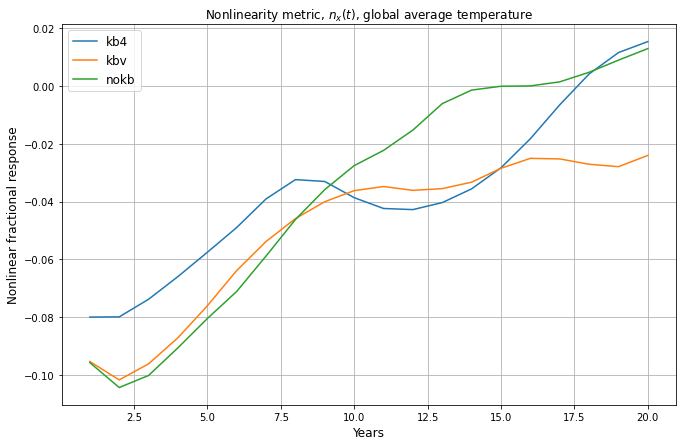

In [11]:
plt.figure(figsize=(11,7))

plt.plot(np.linspace(1,20,20), (gat_cool_kb4 - gat_cont_kb4 + gat_warm_kb4 - gat_cont_kb4) / ((np.abs(gat_cool_kb4 - gat_cont_kb4) + np.abs(gat_warm_kb4 - gat_cont_kb4))/2), label='kb4')
plt.plot(np.linspace(1,20,20), (gat_cool_kbv - gat_cont_kbv + gat_warm_kbv - gat_cont_kbv) / ((np.abs(gat_cool_kbv - gat_cont_kbv) + np.abs(gat_warm_kbv - gat_cont_kbv))/2), label='kbv')
plt.plot(np.linspace(1,20,20), (gat_cool_nokb - gat_cont_nokb + gat_warm_nokb - gat_cont_nokb) / ((np.abs(gat_cool_nokb - gat_cont_nokb) + np.abs(gat_warm_nokb - gat_cont_nokb))/2), label='nokb')

plt.title('Nonlinearity metric, $n_x(t)$, global average temperature',fontsize=12)
plt.legend(fontsize=12)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Nonlinear fractional response',fontsize=12)
plt.grid()

# plt.savefig('access_diff_diffusivities_nonlinearity.jpg', dpi=200)

In [8]:
def load_horizontal_temp(expt_cont, expt_perturb):
    temp_cont = cc.querying.getvar(expt_cont, var, session, start_time = yr_beg, end_time = yr_end).chunk(chunks='auto').groupby('time.year').mean(dim='time')
    temp = cc.querying.getvar(expt_perturb, var, session, start_time = yr_beg, end_time = yr_end).chunk(chunks='auto').groupby('time.year').mean(dim='time')
    temp_anom = temp - temp_cont
    
    area_t = cc.querying.getvar(expt_perturb, 'area_t', session, n=1)
    mask = temp.isel(year=0).copy()
    mask = mask / mask
    area = area_t * mask
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    
    var_horizontal = (temp_anom * area_t).sum('xt_ocean').sum('yt_ocean') / area_sum
    
    return var_horizontal.load()

var = 'temp'
yr_beg = '2400-01-02'
yr_end = '2449-12-31'

temp_horizontal_warm_kbv = load_horizontal_temp('1deg_jra55_ryf_cont', '1deg_jra55_ryf_warm_x1')
temp_horizontal_cool_kbv = load_horizontal_temp('1deg_jra55_ryf_cont', '1deg_jra55_ryf_cool_x1')

yr_beg = '2100-01-02'
yr_end = '2119-12-31'

temp_horizontal_warm_kb4 = load_horizontal_temp('1deg_jra55_ryf_cont_kb4', '1deg_jra55_ryf_warm_x1_kb4')
temp_horizontal_cool_kb4 = load_horizontal_temp('1deg_jra55_ryf_cont_kb4', '1deg_jra55_ryf_cool_x1_kb4')

temp_horizontal_warm_nokb = load_horizontal_temp('1deg_jra55_ryf_cont_nokb', '1deg_jra55_ryf_warm_x1_nokb')
temp_horizontal_cool_nokb = load_horizontal_temp('1deg_jra55_ryf_cont_nokb', '1deg_jra55_ryf_cool_x1_nokb')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datet

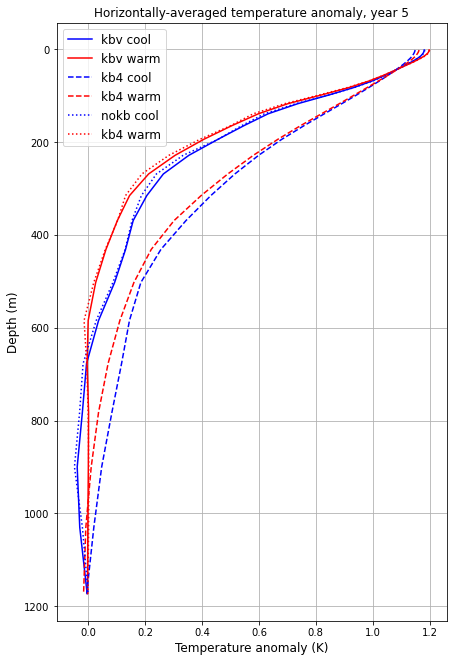

In [9]:
plt.figure(figsize=(7,11))

depth=1300
year=5

plt.plot(-1*temp_horizontal_cool_kbv.isel(year=year).sel(st_ocean=slice(None,depth)), temp_horizontal_cool_kbv.st_ocean.sel(st_ocean=slice(None, depth)), label='kbv cool', color='b', linestyle='-')
plt.plot(temp_horizontal_warm_kbv.isel(year=year).sel(st_ocean=slice(None,depth)), temp_horizontal_cool_kbv.st_ocean.sel(st_ocean=slice(None, depth)), label='kbv warm',color='r', linestyle='-')

plt.plot(-1*temp_horizontal_cool_kb4.isel(year=year).sel(st_ocean=slice(None,depth)), temp_horizontal_cool_kbv.st_ocean.sel(st_ocean=slice(None, depth)), label='kb4 cool', color='b', linestyle='--')
plt.plot(temp_horizontal_warm_kb4.isel(year=year).sel(st_ocean=slice(None,depth)), temp_horizontal_cool_kbv.st_ocean.sel(st_ocean=slice(None, depth)), label='kb4 warm',color='r', linestyle='--')

plt.plot(-1*temp_horizontal_cool_nokb.isel(year=year).sel(st_ocean=slice(None,depth)), temp_horizontal_cool_kbv.st_ocean.sel(st_ocean=slice(None, depth)), label='nokb cool', color='b', linestyle=':')
plt.plot(temp_horizontal_warm_nokb.isel(year=year).sel(st_ocean=slice(None,depth)), temp_horizontal_cool_kbv.st_ocean.sel(st_ocean=slice(None, depth)), label='kb4 warm',color='r', linestyle=':')

plt.title(f'Horizontally-averaged temperature anomaly, year {year}', fontsize=12)
plt.xlabel('Temperature anomaly (K)',fontsize=12)
plt.ylabel('Depth (m)',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.gca().invert_yaxis()

# plt.savefig('access_diff_diffusivities_horizontal_temp.jpg', dpi=200, bbox_inches='tight')